# Text Processor

## Goal

Create a raw text processer, that would return proper tokinised and tagged text in the form of list of centences, which in turn are a list of words/tag, plus some method for quick text pre-analysis.

## Purpose

Current document is a research log and test of Text Processor implementations.

In [1]:
EXM_FILE = 'data/news.txt'

### Importing necessary libraries

In [2]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options
sns.set_style("whitegrid")
sns.set_context("poster")

# NLTK imports
import nltk

In [3]:
# Read raw text
f = open(EXM_FILE, 'r')
text = nltk.Text(nltk.word_tokenize(f.read()))
f.close()

In [4]:
text.tokens

['From',
 'The',
 'Dialy',
 'Oklahoman',
 'Newspaper',
 ',',
 'September',
 '27',
 ',',
 '1993',
 ',',
 'Page',
 '1',
 ':',
 'COMPUTER',
 'PORN',
 'CASE',
 'TRIGGERS',
 'LEGAL',
 'QUESTIONS',
 'By',
 'David',
 'Zizzo',
 ',',
 'Staff',
 'Writer',
 'Is',
 'talking',
 'to',
 'Anthony',
 'Davis',
 'hazardous',
 'to',
 'your',
 'health',
 '?',
 'In',
 'a',
 'manner',
 'of',
 'speaking',
 ',',
 'that',
 "'s",
 'what',
 'numerous',
 'people',
 'with',
 'computers',
 'and',
 'modems',
 'apparently',
 'have',
 'been',
 'worrying',
 'about',
 'since',
 'late',
 'July',
 '.',
 'That',
 "'s",
 'when',
 'Oklahoma',
 'City',
 'police',
 'raided',
 'Davis',
 "'",
 'software',
 'publishing',
 'firm',
 'and',
 'confiscated',
 'his',
 'sophisticated',
 'commercial',
 'computer',
 'bulletin',
 'board',
 'system',
 '.',
 'Authorities',
 'allege',
 'Davis',
 'was',
 'selling',
 'pornographic',
 'computerized',
 'materials',
 'on',
 'CD-ROM',
 'and',
 'through',
 'files',
 'downloaded',
 'over',
 'phone',
 

### Most 50 words frequency distribution

In [5]:
def plot_freq_dist(fdist, limit=50, pltsize=(15, 10)):
    df = pd.DataFrame(fdist.most_common(limit), columns=['word', 'freq'])
    plt.figure(figsize=pltsize)
    bp = sns.barplot(x=df.word, y=df.freq)
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
    plt.show()

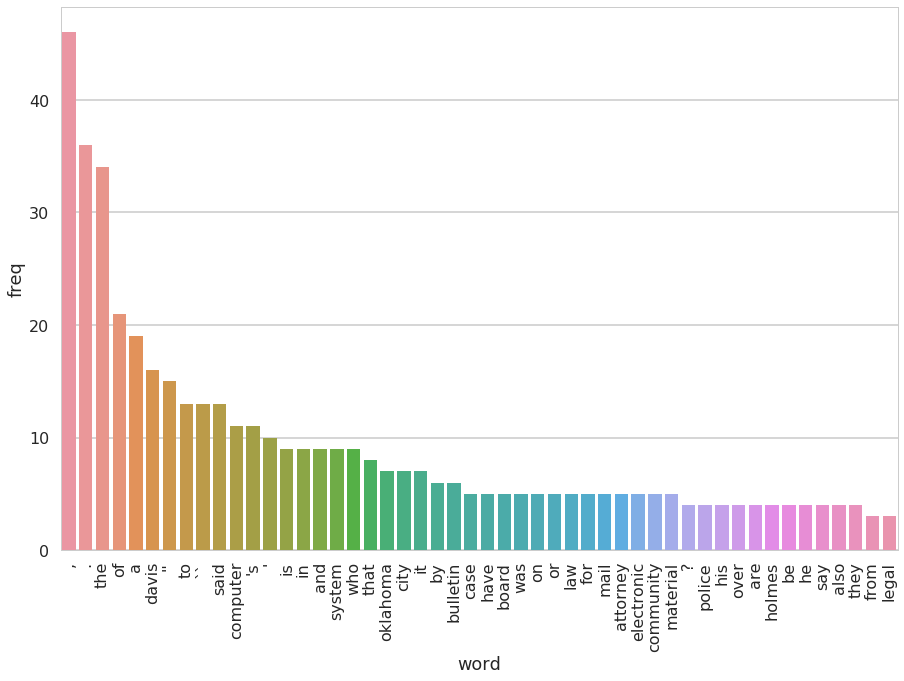

In [6]:
#fdist = nltk.FreqDist(w.lower() for w in text)
plot_freq_dist(nltk.FreqDist(w.lower() for w in text))

## Normilising text

### Apply `nltk.PorterStemmer()`

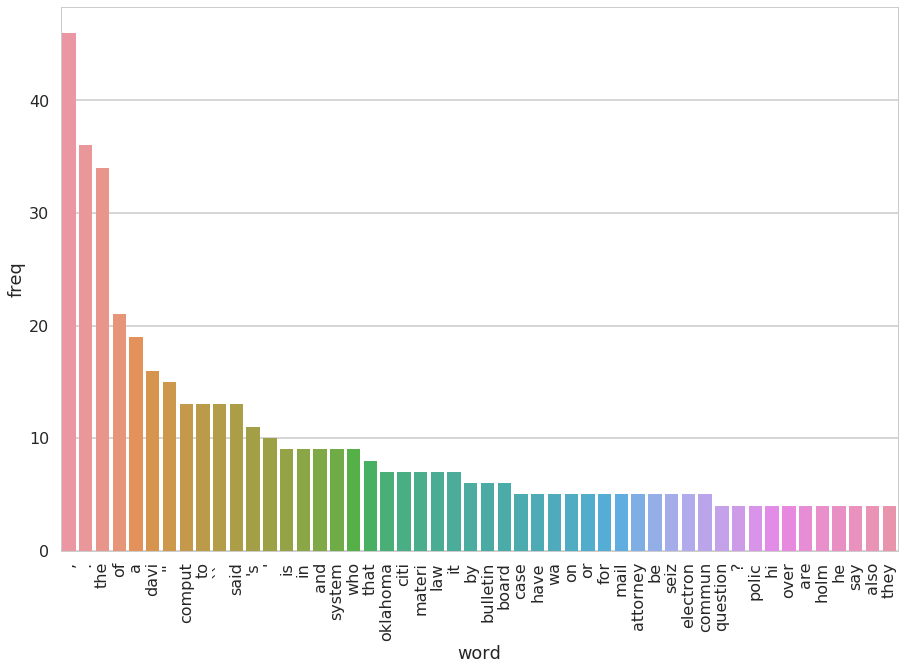

In [7]:
porter_stemmer = nltk.PorterStemmer()
plot_freq_dist(nltk.FreqDist(porter_stemmer.stem(w).lower() for w in text))

### Apply `nltk.LancasterStemmer`

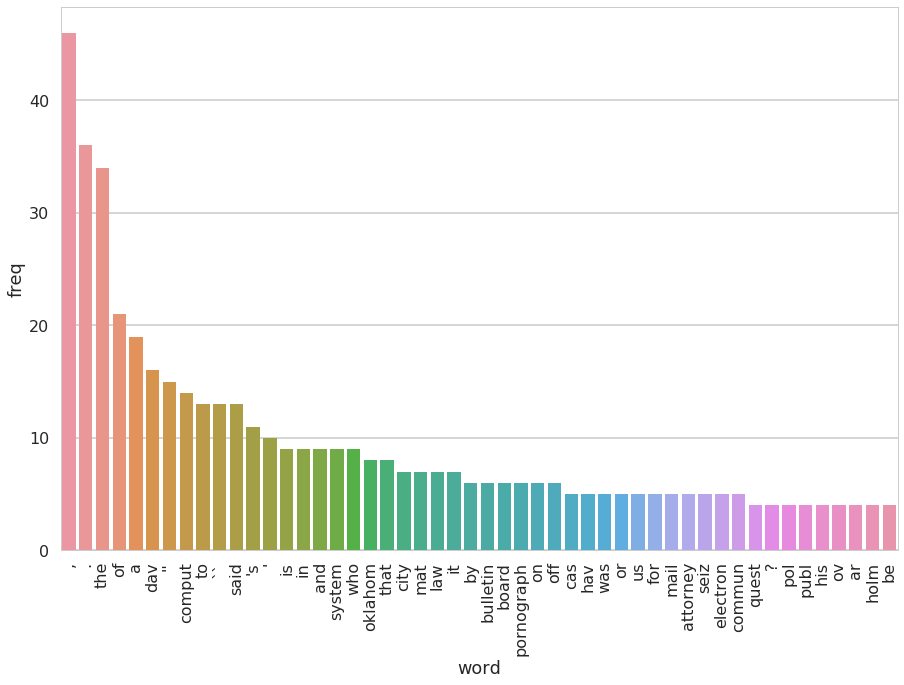

In [8]:
lancaster = nltk.LancasterStemmer()
plot_freq_dist(nltk.FreqDist(lancaster.stem(w).lower() for w in text))

### Apply `nltk.WordNetLemmitizer()`

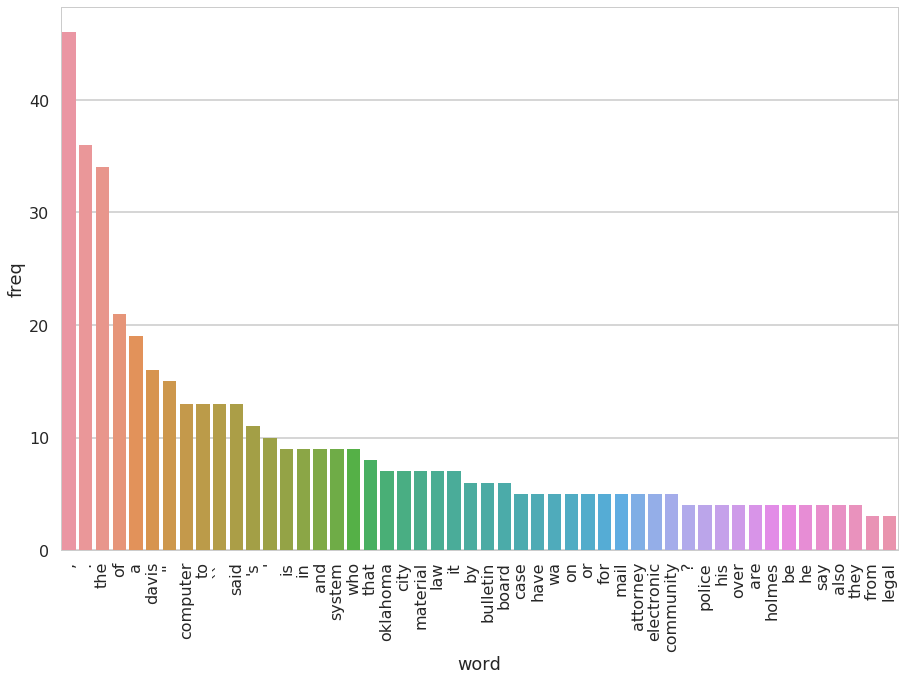

In [9]:
wnl = nltk.WordNetLemmatizer()
plot_freq_dist(nltk.FreqDist(wnl.lemmatize(w).lower() for w in text))

## Tokenizing text

### Moses tokeniser

In [10]:
from nltk.tokenize.moses import MosesTokenizer

tokeniser = MosesTokenizer()
f = open(EXM_FILE, 'r')
m_text = tokeniser.tokenize(f.read())
f.close()
m_text[:5]

['From', 'The', 'Dialy', 'Oklahoman', 'Newspaper']

In [11]:
# Retokenise string merging multi-word expressions into single tokens
from nltk.tokenize import MWETokenizer
tokeniser = MWETokenizer([('a', 'little', 'bit')], separator=' ')
tokeniser.tokenize(['a', 'little', 'bit'])

['a little bit']

### Train `nltk.tokenize.punkt` to properly tokenise sencences

[`nltk` docs](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.punkt)

### `nltk.tokenize.texttiling module`

Tokenize a document into topical sections using the TextTiling algorithm. This algorithm detects subtopic shifts based on the analysis of lexical co-occurrence patterns.

[Docs](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.texttiling)

In [46]:
import textprocessor

tp = textprocessor.TextProcessor.from_file('data/news.txt')

In [47]:
words = tp.get_filtered_words(nostopwords=True, nopunct=True)

In [48]:
most_common_words = [w[0] for w in tp.most_common_words(words=words, n=10)]

In [51]:
most_common_words

['davis',
 'said',
 'computer',
 'system',
 'oklahoma',
 'city',
 'bulletin',
 'case',
 'board',
 'law']

In [49]:
chunks = tp.get_np_chunks()

In [50]:
chunks

[Tree('S', [('from', 'IN'), Tree('NP', [('the', 'DT'), ('dialy', 'NN'), ('oklahoman', 'JJ'), ('newspaper', 'NN')]), (',', ','), ('september', 'VB'), Tree('NP', [('27', 'CD')]), (',', ','), Tree('NP', [('1993', 'CD')]), (',', ','), Tree('NP', [('page', 'NN'), ('1', 'CD')]), (':', ':'), Tree('NP', [('computer', 'NN'), ('porn', 'NN'), ('case', 'NN')]), ('triggers', 'VBZ'), Tree('NP', [('legal', 'JJ'), ('questions', 'NNS')]), ('by', 'IN'), Tree('NP', [('david', 'JJ'), ('zizzo', 'NN')]), (',', ','), Tree('NP', [('staff', 'NN'), ('writer', 'NN')]), ('is', 'VBZ'), ('talking', 'VBG'), ('to', 'TO'), ('anthony', 'VB'), ('davis', 'RB'), ('hazardous', 'JJ'), ('to', 'TO'), Tree('NP', [('your', 'PRP$'), ('health', 'NN')]), ('?', '.')]),
 Tree('S', [('in', 'IN'), Tree('NP', [('a', 'DT'), ('manner', 'NN')]), ('of', 'IN'), Tree('NP', [('speaking', 'NN')]), (',', ','), Tree('NP', [('that', 'DT')]), ("'s", 'VBZ'), Tree('NP', [('what', 'WP')]), Tree('NP', [('numerous', 'JJ'), ('people', 'NNS')]), ('with',

In [41]:
def get_np_trees(tree):
    return list(tree.subtrees(filter=lambda t: t.label() == 'NP'))

In [42]:
np_trees = []
for ch in chunks:
    np_trees.extend(get_np_trees(ch))

In [43]:
def get_phrases(trees):
    phs = set()
    for t in trees:
        leaves = [l[0] for l in t.leaves()]
        phs.add(' '.join(leaves))
    return phs

In [44]:
ph_trees = [t for t in np_trees if any([l[0] in most_common_words for l in t.leaves()])]

In [45]:
phrases = get_phrases(ph_trees)
phrases

{"'s pornography law",
 'a bulletin board newsletter',
 'a case',
 'a computer',
 'a large electronic mail system',
 'a law enforcement',
 'board service',
 'bulletin board system operators',
 'clown city',
 'computer bulletin board system',
 'computer circles',
 'computer porn case',
 'davis',
 "davis ' attorney",
 "davis ' case",
 "davis ' cds",
 "davis ' computer",
 "davis ' computer equipment",
 "davis ' software publishing firm",
 "davis ' system",
 'entire system',
 'federal law',
 'his computer system',
 'his pay-for-play computer service',
 'his sophisticated commercial computer bulletin board system',
 'law',
 'nearly every computer magazine',
 'numerous bulletin boards',
 'oklahoma',
 'oklahoma city',
 'oklahoma city police',
 'oklahoma laws',
 'the case',
 'the city',
 'the davis bust',
 'the davis case',
 'the explicit material davis',
 'the law',
 'the national computer community',
 'the system'}

- get common words friquencies combined
- stemm & lematize words before frequency calculation
- get all np chunks that contain part of the words (for stemmed & lemmatised frequencies)

## SVO splits